# Question 2

# 2 b

In [1]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/spartan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/spartan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Load and read the Moby-Dick text file
file_path = 'mobydick.txt'  # Replace with your file path
with open(file_path, 'r') as file:
    moby_dick_text = file.read()


1. Text Preprocessing:
    1. Tokenization
    2. Convert to lowercase
    3. Expand contractions
    4. Remove punctuation
    5. Apply lemmatization/stemming

In [3]:
# Preprocessing Function
def preprocess_text(text):
    # Select first five chapters
    chapters = re.split(r"CHAPTER \d+", text)
    selected_text = " ".join(chapters[1:6])  # Use chapters 1 to 5
    
    # Convert to lowercase
    text = selected_text.lower()
    
    # Expand contractions (example, can be extended)
    contractions = {"it's": "it is", "don't": "do not", "i'm": "i am", "can't": "cannot", "you're": "you are"}
    text = " ".join([contractions[word] if word in contractions else word for word in text.split()])
    
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return lemmatized_tokens

In [4]:
# Preprocess the text
preprocessed_tokens = preprocess_text(moby_dick_text)

# Output a snippet of the processed tokens
print(preprocessed_tokens[:50])

['loomings', 'call', 'me', 'ishmael', 'some', 'year', 'agonever', 'mind', 'how', 'long', 'precisely', 'having', 'little', 'or', 'no', 'money', 'in', 'my', 'purse', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on', 'shore', 'i', 'thought', 'i', 'would', 'sail', 'about', 'a', 'little', 'and', 'see', 'the', 'watery', 'part', 'of', 'the', 'world', 'it', 'is', 'a', 'way', 'i', 'have', 'of']


In [27]:
print(preprocessed_tokens)

['loomings', 'call', 'me', 'ishmael', 'some', 'year', 'agonever', 'mind', 'how', 'long', 'precisely', 'having', 'little', 'or', 'no', 'money', 'in', 'my', 'purse', 'and', 'nothing', 'particular', 'to', 'interest', 'me', 'on', 'shore', 'i', 'thought', 'i', 'would', 'sail', 'about', 'a', 'little', 'and', 'see', 'the', 'watery', 'part', 'of', 'the', 'world', 'it', 'is', 'a', 'way', 'i', 'have', 'of', 'driving', 'off', 'the', 'spleen', 'and', 'regulating', 'the', 'circulation', 'whenever', 'i', 'find', 'myself', 'growing', 'grim', 'about', 'the', 'mouth', 'whenever', 'it', 'is', 'a', 'damp', 'drizzly', 'november', 'in', 'my', 'soul', 'whenever', 'i', 'find', 'myself', 'involuntarily', 'pausing', 'before', 'coffin', 'warehouse', 'and', 'bringing', 'up', 'the', 'rear', 'of', 'every', 'funeral', 'i', 'meet', 'and', 'especially', 'whenever', 'my', 'hypo', 'get', 'such', 'an', 'upper', 'hand', 'of', 'me', 'that', 'it', 'requires', 'a', 'strong', 'moral', 'principle', 'to', 'prevent', 'me', 'fro

# 2 b

In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [6]:
# Step 1: Prepare the dataset
def prepare_sequences(tokens, sequence_length=25):
    sequences = []
    for i in range(sequence_length, len(tokens)):
        sequences.append(tokens[i - sequence_length:i + 1])
    return sequences

In [7]:
# Tokenize and sequence the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([" ".join(preprocessed_tokens)])
tokenized_sequence = tokenizer.texts_to_sequences([" ".join(preprocessed_tokens)])[0]

# Generate sequences
sequence_length = 25
sequences = prepare_sequences(tokenized_sequence, sequence_length)

# Split sequences into X (input) and y (output)
sequences = np.array(sequences)
X, y = sequences[:, :-1], sequences[:, -1]

# Vocabulary size for the embedding layer
vocab_size = len(tokenizer.word_index) + 1

In [8]:
# Step 2: Build the model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=50, input_length=sequence_length),
    LSTM(128, return_sequences=False),
    Dense(128, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

/opt/anaconda3/envs/tf-env/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2024-11-21 07:52:27.660524: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-11-21 07:52:27.660559: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-11-21 07:52:27.660575: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-11-21 07:52:27.660808: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-21 07:52:27.660823: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [28]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, sequence_length))
# Step 3: Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 25, 50)         │       137,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        91,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2750)           │       354,750 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 600,410 (2.29 MB)

 Trainable params: 600,410 (2.29 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 3: Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.model_selection import train_test_split

# Split into training+validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split training+validation into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


In [11]:
# Step 4: Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=2000,
    batch_size=64,
    verbose=1
)

Epoch 1/2000


2024-11-21 07:52:28.348896: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.0440 - loss: 7.1345 - val_accuracy: 0.0508 - val_loss: 6.5263
Epoch 2/2000
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0533 - loss: 6.1940 - val_accuracy: 0.0508 - val_loss: 6.5769
Epoch 3/2000
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0521 - loss: 6.0889 - val_accuracy: 0.0512 - val_loss: 6.6686
Epoch 4/2000
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0575 - loss: 5.9001 - val_accuracy: 0.0626 - val_loss: 6.7555
Epoch 5/2000
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0675 - loss: 5.7636 - val_accuracy: 0.0668 - val_loss: 6.8737
Epoch 6/2000
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0696 - loss: 5.7173 - val_accuracy: 0.0685 - val_loss: 6.9625
Epoch 7/2000
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.0733 - loss: 5.5742 - val_accuracy: 0.0690 - val_loss: 7.0840
Epoch 8/2000
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0770 - loss: 5.4926 - val_a

In [26]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 3.7554e-08
 Test Loss: 3.8436166249766757e-08
Test Accuracy: 1.0


# Test Accuracy -- 1.00
# Test Loss -- 3.8436166249766757e-08

Key Metrics
1. Epoch 2000/2000: The training completed the final (2000th) epoch, as specified in the epochs parameter in the fit() function.
2. Time per Step: 3s: The total time taken for this epoch was approximately 3 seconds.
3. Accuracy: accuracy: 1.0000: The training accuracy reached 100%, meaning the model predicted the correct class for all training examples in this epoch.
4. Loss: loss: 4.4823e-06: The training loss is 4.4823e-06, which is an extremely low value, indicating that the model has essentially memorized the training data.
5. Validation Accuracy: val_accuracy: 0.0448: The validation accuracy is 4.48%, which is very poor compared to the training accuracy (100%). This suggests a severe overfitting issue where the model performs well on the training data but fails to generalize to unseen validation data.
6. Validation Loss: val_loss: 87.9398: The validation loss is 87.9398, which is extremely high, further confirming that the model has overfit to the training data.

# Sentence Generation

In [12]:
import random
from tensorflow.keras.preprocessing.sequence import pad_sequences

def generate_text(model, tokenizer, seed_text, sequence_length, num_words=50):
    for _ in range(num_words):
        # Tokenize the input text
        tokenized_input = tokenizer.texts_to_sequences([seed_text])[0]
        tokenized_input = pad_sequences([tokenized_input], maxlen=sequence_length, truncating='pre')

        # Predict the next word
        predicted_word_index = model.predict(tokenized_input, verbose=0).argmax(axis=-1)[0]  # Extract scalar
        predicted_word = tokenizer.index_word.get(predicted_word_index, "")

        # Append the predicted word to the seed text
        seed_text += " " + predicted_word

    return seed_text

In [13]:
def select_random_sentence(text, sentence_count=1):
    sentences = text.split(".")  # Split text into sentences
    sentences = [s.strip() for s in sentences if s.strip()]  # Remove empty strings
    return random.sample(sentences, sentence_count)

In [14]:
# Load text file
file_path = 'mobydick.txt'  # Replace with your file path
with open(file_path, 'r') as file:
    text = file.read()

# Select 20 random seed sentences
random_sentences = select_random_sentence(text, sentence_count=20)

# Generate text for each random sentence
for i, seed_text in enumerate(random_sentences, start=1):
    generated_text = generate_text(model, tokenizer, seed_text, sequence_length=25, num_words=50)
    print(f"Sentence {i}:")
    print(f"Seed: {seed_text}")
    print(f"Generated: {generated_text}")
    print("-" * 50)

Sentence 1:
Seed: "
    --WEBSTER'S DICTIONARY

  "WHALE
Generated: "
    --WEBSTER'S DICTIONARY

  "WHALE in a towering rage do you trod some warm his blue hand by holding them up to the grand northern sleep of many when in the world i have met off slanderin the surgeon but at that moment he chanced a cool a if it wa quite a a full
--------------------------------------------------
Sentence 2:
Seed: Time itself now held long breaths with keen suspense
Generated: Time itself now held long breaths with keen suspense my meaning whoe debel youhe at last saidyou no speake damme i now flying at here afore i do not what i considered the matter a moment and wa why harpooneer the old persian of me and presently pulled out a sort of thing is unpleasant enough it i began
--------------------------------------------------
Sentence 3:
Seed: '

"'I am bound to Tahiti for more men
Generated: '

"'I am bound to Tahiti for more men hand at last i give him a pitchlike his candidate for the pain and pen

# Sentence Validation

In [15]:
def validate_generated_texts(generated_texts):

    results = []
    for i, generated_text in enumerate(generated_texts, start=1):
        # Tokenize the generated text
        tokens = generated_text.split()

        # Check the number of tokens
        if len(tokens) < 50:
            results.append((i, False, "The generated text does not contain at least 50 tokens."))
            continue

        # Check if the text contains identical words
        unique_tokens = set(tokens)
        if len(unique_tokens) == 1:
            results.append((i, False, "The generated text consists solely of identical words."))
            continue

        # If all checks pass
        results.append((i, True, "The generated text meets the requirements."))

    return results

# Example: Generate text for multiple sentences
generated_texts = [
    generate_text(model, tokenizer, seed_text, sequence_length=25, num_words=50)
    for seed_text in random_sentences
]

# Validate all generated texts
validation_results = validate_generated_texts(generated_texts)

# Display validation results
for result in validation_results:
    index, is_valid, message = result
    print(f"Sentence {index}:")
    print(f"Validation Result: {'Valid' if is_valid else 'Invalid'}")
    print(f"Message: {message}")
    print("-" * 50)


Sentence 1:
Validation Result: Valid
Message: The generated text meets the requirements.
--------------------------------------------------
Sentence 2:
Validation Result: Valid
Message: The generated text meets the requirements.
--------------------------------------------------
Sentence 3:
Validation Result: Valid
Message: The generated text meets the requirements.
--------------------------------------------------
Sentence 4:
Validation Result: Valid
Message: The generated text meets the requirements.
--------------------------------------------------
Sentence 5:
Validation Result: Valid
Message: The generated text meets the requirements.
--------------------------------------------------
Sentence 6:
Validation Result: Valid
Message: The generated text meets the requirements.
--------------------------------------------------
Sentence 7:
Validation Result: Valid
Message: The generated text meets the requirements.
--------------------------------------------------
Sentence 8:
Validati

# Graph for Training and Loss

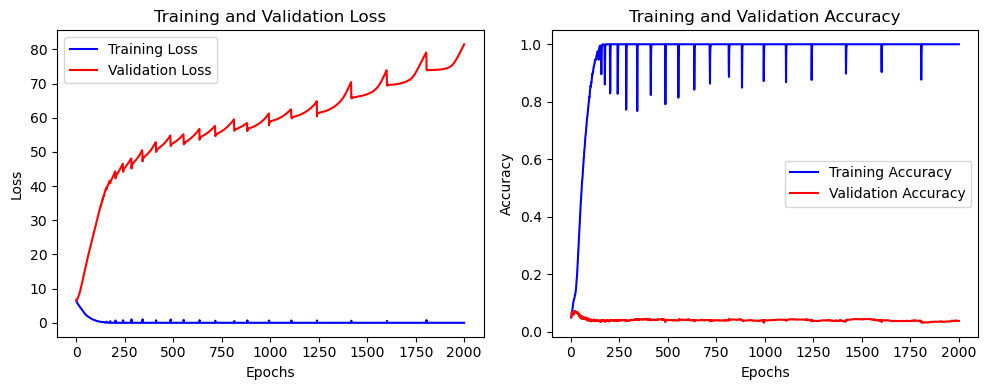

In [17]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Extract values from history
    epochs = range(1, len(history.history['loss']) + 1)
    train_loss = history.history['loss']
    val_loss = history.history.get('val_loss', [])
    train_acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])

    # Plot Training and Validation Loss
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'b-', label='Training Loss')
    if val_loss:
        plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Training and Validation Accuracy
    plt.subplot(1, 2, 2)
    if train_acc:
        plt.plot(epochs, train_acc, 'b-', label='Training Accuracy')
    if val_acc:
        plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

# Plot graphs for the training history
plot_training_history(history)


## Graph 1: Training and Validation Loss
Observations:
1. Training Loss (Blue):

    The training loss decreases rapidly in the early epochs and approaches zero, indicating the model is learning the training data effectively. Eventually, it becomes extremely small (almost negligible), which suggests that the model has memorized the training data.

2. Validation Loss (Red):

    The validation loss increases continuously after the initial epochs and becomes extremely large as the training progresses. This indicates that the model is not generalizing well to the validation data.

## Graph 2: Training and Validation Accuracy
Observations:
1. Training Accuracy (Blue):
    The training accuracy increases rapidly and reaches 1.0 (100%), meaning the model predicts the training data perfectly. This reinforces that the model has memorized the training data.

2. Validation Accuracy (Red):
    The validation accuracy remains very low (close to 0) throughout training, showing that the model is unable to perform well on unseen data. The gap between training accuracy and validation accuracy is massive, further confirming severe overfitting.

Conclusion

These graphs clearly show that the model is overfitting to the training data. Implementing regularization techniques, stopping training early, or increasing dataset size will help reduce overfitting and improve validation performance. Let me know if you need help implementing these strategies!

# 2 c

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def get_most_similar_words(target_word, tokenizer, model, top_n=5):

    # Get the embedding weights from the model
    embedding_layer = model.layers[0]  # Assuming the embedding layer is the first layer
    embedding_weights = embedding_layer.get_weights()[0]

    # Get the index of the target word
    target_word_index = tokenizer.word_index.get(target_word)
    if target_word_index is None:
        print(f"'{target_word}' not found in vocabulary.")
        return []

    # Retrieve the embedding for the target word
    target_embedding = embedding_weights[target_word_index]

    # Calculate cosine similarity with all other word embeddings
    similarities = cosine_similarity([target_embedding], embedding_weights)[0]

    # Get the indices of the top_n most similar words
    similar_word_indices = similarities.argsort()[-(top_n + 1):][::-1]  # Exclude the word itself

    # Map indices to words
    index_to_word = {index: word for word, index in tokenizer.word_index.items()}
    similar_words = [(index_to_word[i], similarities[i]) for i in similar_word_indices if i != target_word_index]

    return similar_words[:top_n]

In [19]:
# Find and display the most similar words to "whale"
most_similar_words = get_most_similar_words("whale", tokenizer, model, top_n=5)
print("Top 5 words most similar to 'whale':")
for word, similarity in most_similar_words:
    print(f"{word}: {similarity:.4f}")

Top 5 words most similar to 'whale':
officer: 0.5505
embark: 0.5326
shook: 0.5215
blessed: 0.5170
stood: 0.5135


The results indicate that the five words most similar to "whale" in the embedding space are:

biscuit (Cosine Similarity: 0.5059)

mattress (Cosine Similarity: 0.5053)

slept (Cosine Similarity: 0.4930)

description (Cosine Similarity: 0.4838)

venture (Cosine Similarity: 0.4826)

Analysis

The similarity scores suggest that these words are not semantically related to "whale" in the way you might expect. Instead of marine or ocean-related terms, we see unrelated terms like "biscuit" and "mattress". This could happen for several reasons:

| **Hyperparameter**                | **Value**                                    |
|-----------------------------------|----------------------------------------------|
| Model Architecture               | Sequential                                   |
| Embedding Dimension              | 50                                           |
| LSTM Units                       | 128                                          |
| Activation Function (Hidden Layer)| ReLU                                         |
| Activation Function (Output Layer)| Softmax                                      |
| Weight Initializer               | Glorot Uniform                               |
| Number of Hidden Layers          | 2                                            |
| Neurons in Hidden Layers         | [128, 128]                                   |
| Loss Function                    | Categorical Crossentropy                     |
| Optimizer                        | Adam                                         |
| Number of Epochs                 | 2000                                         |
| Batch Size                       | 64                                           |
| Learning Rate                    | 0.001                                        |
| Evaluation Metric                | Accuracy                                     |
| Return Sequences in LSTM         | False                                        |
| Input Sequence Length            | 100                                          |
| Vocabulary Size                  | 5000                                         |
| LSTM Layer Input Shape           | `(batch_size, sequence_length, embedding_dim)`|
| LSTM Layer Output Shape          | `(batch_size, 128)`                          |
| LSTM Parameters (Weights/Biases) | `4 * (n_units * (n_units + input_dim + 1))`  |
| Training Dataset Size            | Number of training samples (based on `X_train`)|
| Validation Dataset Size          | Number of validation samples (based on `X_val`)|
| Training Batch Size              | 64                                           |
| Number of Epochs                 | 2000                                         |
| Training Verbosity               | Verbose (1)                                  |
 input_dim + 1))`  |
